 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DoranLyong/Awesome-Tensor-Architecture/blob/main/pytorch_reference/NYU-DL/12-Attention-and-Transformer/(Soft)Argmax.ipynb)

In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_theme()

In [2]:
def plot(x, y, label:str):
    index = np.array([idx for idx in range(len(x))])

    plt.plot(index, x, label=f"input")
    plt.plot(index, y, label=f"{label}")
    plt.legend()

In [3]:
data = np.array([0.1, 0.3, 0.6, 2.1, 0.55])

In [4]:
get_hardmax = lambda data: data==max(data)
hardmax = get_hardmax(data)
argmax = np.matmul(hardmax, np.array(range(data.size)))

print("hardmax=", hardmax) # one-hot encoding
print("argmax=", argmax) 

hardmax= [False False False  True False]
argmax= 3


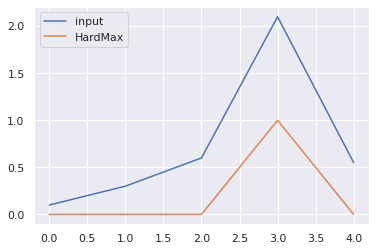

In [5]:
plot(data, hardmax, label="HardMax")

In [6]:
softmax = np.exp(data) / np.sum(np.exp(data))
expected_index = np.matmul( softmax , np.array(range(data.size))) # E(I) = p * index

print("softmax=",softmax)
print("Sum=",np.sum(softmax))
print("E(I)=", expected_index)
print("The expected location of where the maximum should be 3.")

softmax= [0.07795756 0.09521758 0.12853029 0.57603278 0.12226179]
Sum= 1.0
E(I)= 2.569423667024009
The expected location of where the maximum should be 3.


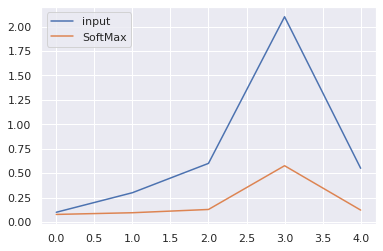

In [7]:
plot(data, softmax, label="SoftMax")

In [10]:
beta = 10 
d = data * beta 
beta_softmax = np.exp(d)/np.sum(np.exp(d))
soft_argmax = np.matmul( beta_softmax , np.array(range(data.size))) # E(I) = p * index ; 향상된 softmax 버전

print("beta-softmax=", beta_softmax)
print("soft-argmax=", soft_argmax)
print("Sum=",np.sum(beta_softmax))

beta-softmax= [2.06115257e-09 1.52299720e-08 3.05902165e-07 9.99999491e-01
 1.85539042e-07]
soft-argmax= 2.9999998429934758
Sum= 1.0000000000000002


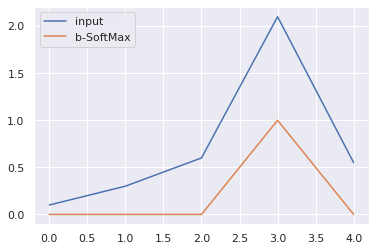

In [9]:
plot(data, beta_softmax, label="b-SoftMax")